In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

### Multi-layer Perceptron

In [3]:
# Load the data
data_folder = os.path.join(os.path.dirname(os.getcwd()), 'data', 'joined')
files = [file for file in os.listdir(data_folder) if file.endswith('joined.csv')]
data = pd.concat([pd.read_csv(os.path.join(data_folder, file)) for file in files], ignore_index=True)

# Split the data into features and target variable
X = data.drop(['name', 'salary', 'salary_adjusted'], axis=1).fillna(0)
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Create MLP model for regression
from sklearn.model_selection import GridSearchCV

def tune_mlp(X_train, y_train):
    param_grid = {
        'hidden_layer_sizes': [(128, 64), (64, 32), (256, 128)],
        'solver': ['lbfgs', 'adam', 'sgd'],
        'alpha': [0.001, 0.01, 0.1]
    }
    # Params {'alpha': 0.0001, 'hidden_layer_sizes': (40, 20), 'solver': 'adam'}
    mlp = MLPRegressor(max_iter=1000, random_state=42, early_stopping=True, n_iter_no_change=10)
    grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Print the best parameters
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

# tune_mlp(X_train, y_train) 
# {'alpha': 0.01, 'hidden_layer_sizes': (256, 128), 'solver': 'lbfgs'}

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# Train the model
params = {'alpha': 0.01, 'hidden_layer_sizes': (128, 64), 'solver': 'lbfgs', 'max_iter': 100, 'random_state': 42}
mlp = MLPRegressor(**params)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)
dump(mlp, os.path.join(os.path.dirname(os.getcwd()), 'models', 'mlp.joblib'))

# Evaluate the model performance to compare how well different models perform
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 score: {r2_score(y_test, y_pred)}')

# 'alpha': 0.01, 'hidden_layer_sizes': (128, 64), 'solver': 'lbfgs'
# Mean squared error: 29273820295695.508
# R2 score: 0.7595951627150411

Mean squared error: 29273820295695.508
R2 score: 0.7595951627150411


c:\Users\Gabriel\Downloads\nba-salary-model\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


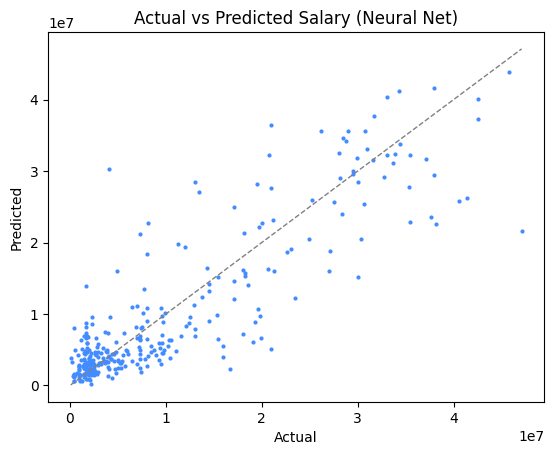

In [7]:
# Plot the results
# Plot the predicted salary vs the actual salary and line of best fit
color_hex = '#438cff'
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, marker='o', s=4, color=color_hex)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', lw=1, color='gray')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Actual vs Predicted Salary (Neural Net)')
plt.show()